In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder ,StandardScaler # Import LabelEncoder
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score ,classification_report
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import confusion_matrix


In [ ]:
data=pd.read_csv('/content/Breast_Cancer.csv')

# explore data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
data.shape

(4024, 16)

In [ ]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


# Analysis

<ipython-input-16-22b271d388f9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status',data=data, palette=(['g','r']))


<Axes: xlabel='Status', ylabel='count'>

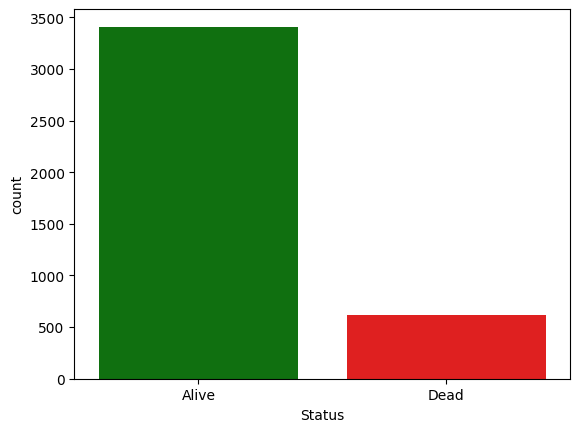

In [ ]:
sns.countplot(x='Status',data=data, palette=(['g','r']))

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
data.value_counts('Status')

,count
Status,
Alive,3408
Dead,616


# transform data

In [ ]:
la= LabelEncoder()

In [ ]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')

In [ ]:
for i in range(0,obj.shape[1]):
   obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])

In [ ]:
obj= obj.astype('int')

In [ ]:
obj

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,2,1,0,0,0,1,3,1,1,1,0
1,2,1,1,1,2,0,2,1,1,1,0
2,2,0,2,2,4,0,2,1,1,1,0
3,2,1,0,0,0,1,3,1,1,1,0
4,2,1,1,0,1,1,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,0
4020,2,0,1,1,2,0,2,1,1,1,0
4021,2,1,1,0,1,0,2,1,1,0,0
4022,0,0,1,0,1,0,2,1,1,1,0


In [ ]:
data= pd.concat([obj,non_obj],axis=1)

In [ ]:
data.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,0,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,0,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,0,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,0,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,0,47,41,3,1,50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Race                    4024 non-null   int64
 1   Marital Status          4024 non-null   int64
 2   T Stage                 4024 non-null   int64
 3   N Stage                 4024 non-null   int64
 4   6th Stage               4024 non-null   int64
 5   differentiate           4024 non-null   int64
 6   Grade                   4024 non-null   int64
 7   A Stage                 4024 non-null   int64
 8   Estrogen Status         4024 non-null   int64
 9   Progesterone Status     4024 non-null   int64
 10  Status                  4024 non-null   int64
 11  Age                     4024 non-null   int64
 12  Tumor Size              4024 non-null   int64
 13  Regional Node Examined  4024 non-null   int64
 14  Reginol Node Positive   4024 non-null   int64
 15  Survival Months      

# Model

In [ ]:
x=data.drop('Status',axis=1)
y=data.Status

In [ ]:
rs =RandomOverSampler(random_state=41)
x_res,y_res=rs.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [ ]:
 model1= LogisticRegression()
 model2= RandomForestClassifier()
 model3= GradientBoostingClassifier()
 model4= DecisionTreeClassifier()
 model5= KNeighborsClassifier()
 model6= GaussianNB()
 model7= SVC()
 model8= XGBClassifier()

In [ ]:
def pred (model):
  model.fit(x_train,y_train)
  pre=model.predict(x_test)
  print(classification_report(y_test,pre))

In [ ]:
pred (model1)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       678
           1       0.76      0.49      0.59       127

    accuracy                           0.89       805
   macro avg       0.83      0.73      0.77       805
weighted avg       0.89      0.89      0.88       805



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pred (model2)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       678
           1       0.78      0.53      0.63       127

    accuracy                           0.90       805
   macro avg       0.85      0.75      0.79       805
weighted avg       0.89      0.90      0.89       805



In [ ]:
pred (model3)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       678
           1       0.82      0.54      0.65       127

    accuracy                           0.91       805
   macro avg       0.87      0.76      0.80       805
weighted avg       0.90      0.91      0.90       805



In [ ]:
pred (model4)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       678
           1       0.49      0.56      0.52       127

    accuracy                           0.84       805
   macro avg       0.70      0.72      0.71       805
weighted avg       0.85      0.84      0.84       805



In [ ]:
pred (model5)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       678
           1       0.71      0.43      0.54       127

    accuracy                           0.88       805
   macro avg       0.80      0.70      0.73       805
weighted avg       0.87      0.88      0.87       805



In [ ]:
pred (model6)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       678
           1       0.44      0.51      0.47       127

    accuracy                           0.82       805
   macro avg       0.67      0.69      0.68       805
weighted avg       0.83      0.82      0.82       805



In [ ]:
pred (model7)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       678
           1       0.87      0.43      0.57       127

    accuracy                           0.90       805
   macro avg       0.89      0.71      0.76       805
weighted avg       0.90      0.90      0.88       805

